In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
import cv2
from skimage.io import imread
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [238]:
df_test = pd.read_csv('../data/test_set.csv')
df_test

,id_img
0,10052
1,10065
2,10079
3,10095
4,10121
...,...
7061,9806
7062,9830
7063,9853
7064,9878


In [653]:
def construir_ruta(row):
    return f"../data/data/images/test/{row['id_img']}.jpg"

df_test['path'] = df_test.apply(construir_ruta, axis=1)

df_test

,id_img,label,path
0,10052,fear,../data/data/images/test/10052.jpg
1,10065,fear,../data/data/images/test/10065.jpg
2,10079,fear,../data/data/images/test/10079.jpg
3,10095,fear,../data/data/images/test/10095.jpg
4,10121,fear,../data/data/images/test/10121.jpg
...,...,...,...
7061,9806,happy,../data/data/images/test/9806.jpg
7062,9830,happy,../data/data/images/test/9830.jpg
7063,9853,happy,../data/data/images/test/9853.jpg
7064,9878,fear,../data/data/images/test/9878.jpg


In [614]:
sample = pd.read_csv('../data/sample_submision.csv')
sample

,id_img,label
0,10052,surprise
1,10065,surprise
2,10079,surprise
3,10095,surprise
4,10121,surprise
...,...,...
7061,9806,surprise
7062,9830,surprise
7063,9853,surprise
7064,9878,surprise


In [239]:
df_train = pd.read_csv('../data/train_set.csv')
df_train

,id_img,path,label
0,0,../data/images/train/angry\0.jpg,angry
1,1,../data/images/train/angry\1.jpg,angry
2,10,../data/images/train/angry\10.jpg,angry
3,10002,../data/images/train/angry\10002.jpg,angry
4,10016,../data/images/train/angry\10016.jpg,angry
...,...,...,...
28816,9969,../data/images/train/surprise\9969.jpg,surprise
28817,9985,../data/images/train/surprise\9985.jpg,surprise
28818,9990,../data/images/train/surprise\9990.jpg,surprise
28819,9992,../data/images/train/surprise\9992.jpg,surprise


In [240]:
df_train['path'] = df_train['path'].str.replace("\\", "/")
df_train

,id_img,path,label
0,0,../data/images/train/angry/0.jpg,angry
1,1,../data/images/train/angry/1.jpg,angry
2,10,../data/images/train/angry/10.jpg,angry
3,10002,../data/images/train/angry/10002.jpg,angry
4,10016,../data/images/train/angry/10016.jpg,angry
...,...,...,...
28816,9969,../data/images/train/surprise/9969.jpg,surprise
28817,9985,../data/images/train/surprise/9985.jpg,surprise
28818,9990,../data/images/train/surprise/9990.jpg,surprise
28819,9992,../data/images/train/surprise/9992.jpg,surprise


In [241]:
df_train['label'].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [242]:
class_names = ['happy', 'neutral', 'sad', 'fear', 'angry', 'surprise', 'disgust']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'happy': 0,
 'neutral': 1,
 'sad': 2,
 'fear': 3,
 'angry': 4,
 'surprise': 5,
 'disgust': 6}

In [444]:
# IMAGE_WIDTH=32
IMAGE_SIZE = (48,48)
TRAIN_PATH = os.getcwd() + "\\..\\data\\data\\images\\train"
# TEST_PATH = os.getcwd() + "\\data\\images\\test"

In [445]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)

            X.append(smallimage)
            y.append(label)
    
    return np.array(X), np.array(y)

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # return X_train, X_test, y_train, y_test


In [628]:
def read_data_test(path, im_size):
    X = []
    # y = []

    for folder in os.listdir(path):
        # label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)

            X.append(smallimage)
            # y.append(label)
    
    return np.array(X)#, np.array(y)

In [631]:
TEST_PATH = os.getcwd() + "\\..\\data_test"

test = read_data_test(TEST_PATH, IMAGE_SIZE)

In [641]:
test

array([[[  1,   1,   1, ...,   6,   3,   2],
        [  2,   0,   1, ...,   5,   2,   3],
        [  1,   1,   2, ...,   5,   2,   3],
        ...,
        [ 18,   6,   0, ...,  63,  75, 107],
        [ 33,  20,   6, ...,  54,  83, 116],
        [ 34,  33,  23, ...,  67, 100, 104]],

       [[159, 157, 158, ..., 131, 134, 137],
        [158, 162, 161, ..., 136, 136, 135],
        [160, 168, 162, ..., 139, 138, 136],
        ...,
        [114, 113, 112, ...,  50,  51,  56],
        [109, 112, 115, ...,  41,  40,  41],
        [107, 109, 114, ...,  27,  32,  35]],

       [[195, 198, 193, ..., 255, 255, 254],
        [188, 193, 202, ..., 251, 255, 255],
        [200, 202, 199, ..., 253, 252, 255],
        ...,
        [250, 251, 251, ..., 255, 255, 255],
        [255, 254, 255, ..., 255, 255, 255],
        [254, 255, 251, ..., 255, 255, 255]],

       ...,

       [[203, 229, 234, ...,  71, 130, 148],
        [152, 227, 228, ...,  58, 124, 151],
        [105, 230, 230, ...,  50, 126, 174

In [633]:
test.shape

(7066, 48, 48)

In [654]:
def cargar_imagenes(df_test):
    imagenes = []

    for index, row in df_test.iterrows():
        image_path = row['path']
        image = imread(image_path)
        imagenes.append(image)

    return np.array(imagenes)

imagenes_array = cargar_imagenes(df_test)

In [656]:
imagenes_array[0]

array([[58, 66, 70, ..., 51, 47, 35],
       [62, 64, 73, ..., 59, 51, 42],
       [66, 69, 87, ..., 58, 54, 53],
       ...,
       [ 8, 15, 19, ...,  5,  7,  8],
       [ 6, 14, 17, ...,  4,  7, 10],
       [ 8, 15, 20, ...,  5,  7,  9]], dtype=uint8)

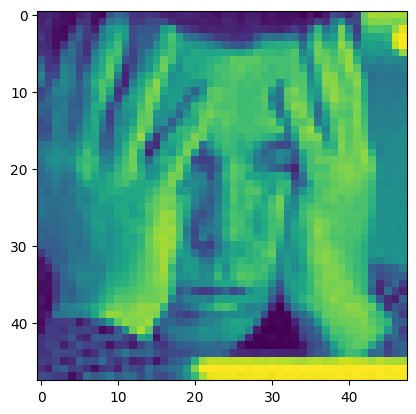

In [658]:
# index = np.random.randint(test.shape[0])
plt.imshow(imagenes_array[1])

In [662]:
imagenes_array = imagenes_array/255

In [663]:
print(imagenes_array.max())
print(imagenes_array.min())

1.0
0.0


In [589]:
X, y = read_data(TRAIN_PATH, IMAGE_SIZE)

In [590]:
print(X.shape)
print(y.shape)

(28821, 48, 48)
(28821,)


In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23056, 48, 48)
(5765, 48, 48)
(23056,)
(5765,)


neutral


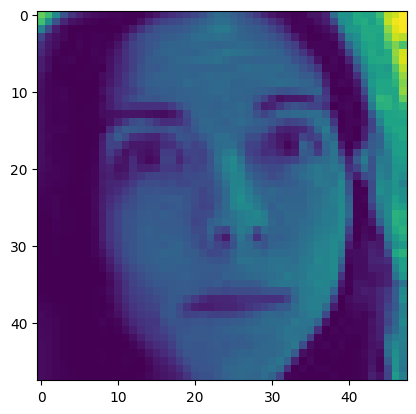

In [591]:
index = np.random.randint(X.shape[0])
print(class_names[y[index]])
plt.imshow(X[index])

In [600]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [450]:
X_train = X_train/255
X_test = X_test/255

In [451]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [601]:
X_train.shape

(23056, 48, 48)

In [592]:
X = X/255

In [593]:
print(X.min())
print(X.max())

0.0
1.0


In [606]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(48, 48, 1)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.BatchNormalization(),
    # keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(512, (3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    # keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    # keras.layers.Dense(128, activation="relu"),
    # keras.layers.Dropout(0.5),
    # keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dropout(0.5),
    # # keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation="softmax")
])

In [607]:
checkpoint = keras.callbacks.ModelCheckpoint('mejor_modelo.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [608]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [610]:
history = model.fit(X_train, y_train, batch_size=32, epochs=35, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/35
721/721 [==============================] - ETA: 0s - loss: 4.2365 - accuracy: 0.3068
Epoch 1: val_accuracy improved from -inf to 0.39965, saving model to mejor_modelo.h5
721/721 [==============================] - 82s 113ms/step - loss: 4.2365 - accuracy: 0.3068 - val_loss: 3.6155 - val_accuracy: 0.3997
Epoch 2/35
721/721 [==============================] - ETA: 0s - loss: 3.5431 - accuracy: 0.3674
Epoch 2: val_accuracy did not improve from 0.39965
721/721 [==============================] - 82s 114ms/step - loss: 3.5431 - accuracy: 0.3674 - val_loss: 3.1208 - val_accuracy: 0.3981
Epoch 3/35
721/721 [==============================] - ETA: 0s - loss: 3.0400 - accuracy: 0.4024
Epoch 3: val_accuracy improved from 0.39965 to 0.45585, saving model to mejor_modelo.h5
721/721 [==============================] - 83s 115ms/step - loss: 3.0400 - accuracy: 0.4024 - val_loss: 2.6777 - val_accuracy: 0.4559
Epoch 4/35
721/721 [==============================] - ETA: 0s - loss: 2.6536 - accurac

In [468]:
# history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

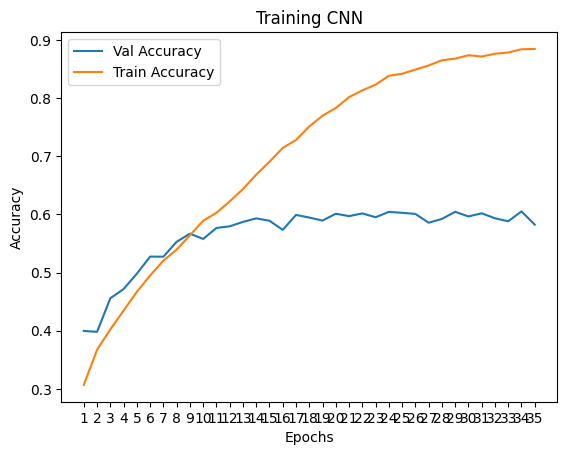

In [611]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,36))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,36))
plt.legend()

In [616]:
from keras.models import load_model

mejor_modelo = load_model('mejor_modelo.h5')

In [617]:
predicciones = mejor_modelo.predict(X_test)

181/181 [==============================] - 5s 24ms/step


In [618]:
etiquetas_predichas = np.argmax(predicciones, axis=1)

In [620]:
etiquetas_predichas

array([2, 2, 0, ..., 1, 2, 4], dtype=int64)

<Axes: >

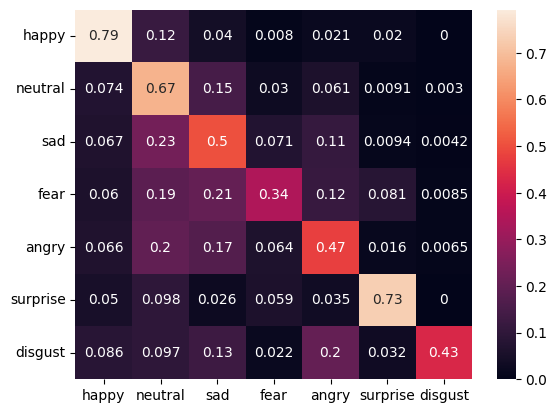

In [619]:
c_mat = confusion_matrix(y_test, etiquetas_predichas, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [621]:
results = mejor_modelo.evaluate(X_test, y_test)
results

181/181 [==============================] - 5s 24ms/step - loss: 1.9869 - accuracy: 0.6052


[1.9869296550750732, 0.6052038073539734]

In [622]:
label_pred = [class_names[pred] for pred in etiquetas_predichas]
label_pred

['sad',
 'sad',
 'happy',
 'sad',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'happy',
 'happy',
 'sad',
 'happy',
 'fear',
 'neutral',
 'neutral',
 'fear',
 'happy',
 'sad',
 'sad',
 'surprise',
 'surprise',
 'sad',
 'neutral',
 'angry',
 'happy',
 'disgust',
 'happy',
 'happy',
 'surprise',
 'happy',
 'surprise',
 'surprise',
 'surprise',
 'happy',
 'surprise',
 'happy',
 'sad',
 'happy',
 'happy',
 'sad',
 'neutral',
 'fear',
 'happy',
 'surprise',
 'happy',
 'sad',
 'neutral',
 'happy',
 'neutral',
 'neutral',
 'sad',
 'happy',
 'neutral',
 'fear',
 'neutral',
 'sad',
 'angry',
 'happy',
 'neutral',
 'neutral',
 'happy',
 'happy',
 'angry',
 'happy',
 'fear',
 'neutral',
 'neutral',
 'fear',
 'surprise',
 'happy',
 'sad',
 'sad',
 'surprise',
 'happy',
 'angry',
 'angry',
 'angry',
 'fear',
 'happy',
 'sad',
 'happy',
 'angry',
 'happy',
 'sad',
 'fear',
 'surprise',
 'fear',
 'happy',
 'surprise',
 'sad',
 'angry',
 'sad',
 'happy',
 'neutral',
 'surprise',
 'sad

In [664]:
predicciones = mejor_modelo.predict(imagenes_array)

221/221 [==============================] - 6s 25ms/step


In [665]:
etiquetas_predichas = np.argmax(predicciones, axis=1)
etiquetas_predichas

array([4, 1, 4, ..., 5, 0, 5], dtype=int64)

In [666]:
label_pred = [class_names[pred] for pred in etiquetas_predichas]
label_pred

['angry',
 'neutral',
 'angry',
 'sad',
 'angry',
 'neutral',
 'sad',
 'sad',
 'sad',
 'neutral',
 'angry',
 'neutral',
 'angry',
 'angry',
 'happy',
 'happy',
 'neutral',
 'angry',
 'sad',
 'happy',
 'neutral',
 'angry',
 'neutral',
 'neutral',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happy',
 'angry',
 'neutral',
 'angry',
 'angry',
 'angry',
 'sad',
 'neutral',
 'angry',
 'sad',
 'angry',
 'neutral',
 'angry',
 'angry',
 'sad',
 'neutral',
 'angry',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'sad',
 'angry',
 'angry',
 'angry',
 'neutral',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'sad',
 'angry',
 'neutral',
 'neutral',
 'angry',
 'angry',
 'neutral',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'sad',
 'angry',
 'neutral',
 'angry',
 'angry',
 'angry',
 'surprise',
 'angry',
 'neutral',
 'angry',
 'neutral',
 'neutr

In [667]:
df_test['label'] = label_pred
df_test

,id_img,label,path
0,10052,angry,../data/data/images/test/10052.jpg
1,10065,neutral,../data/data/images/test/10065.jpg
2,10079,angry,../data/data/images/test/10079.jpg
3,10095,sad,../data/data/images/test/10095.jpg
4,10121,angry,../data/data/images/test/10121.jpg
...,...,...,...
7061,9806,surprise,../data/data/images/test/9806.jpg
7062,9830,happy,../data/data/images/test/9830.jpg
7063,9853,surprise,../data/data/images/test/9853.jpg
7064,9878,happy,../data/data/images/test/9878.jpg


In [668]:
df_test.drop('path', axis=1, inplace=True)
df_test

,id_img,label
0,10052,angry
1,10065,neutral
2,10079,angry
3,10095,sad
4,10121,angry
...,...,...
7061,9806,surprise
7062,9830,happy
7063,9853,surprise
7064,9878,happy


In [669]:
df_test.to_csv('prediccion_2.csv', index=False)